Replot
======

This is some basic Jupyter notebook to show you the features of [replot](https://github.com/Phyks/replot). It gives you usage examples, and is used by me as a visual test suite to check I did not break anything between updates.

For detailed documentations, please refer to the module documentation.

## Let's go!

First import the required modules. Note that importing `replot` will not have any side effect and that if you previously imported `matplotlib` it will be left untouched.

In [4]:
import replot

%matplotlib notebook

In [ ]:
# Also import numpy as it will be useful…
import numpy as np

# and add some black magic for easy reloading of the module before executing any cell (just here to ease testing)
%load_ext autoreload
%autoreload 2

## Basic plotting

Let's start by doing some basic plotting.

<IPython.core.display.Javascript object>


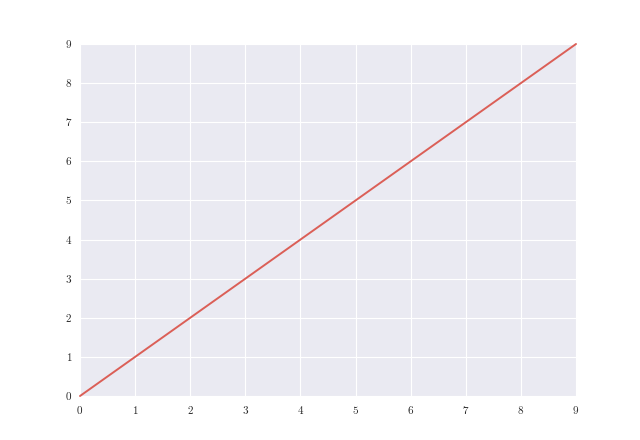

In [6]:
# Let's plot a basic data series, as we would do with matplotlib
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x)

<IPython.core.display.Javascript object>


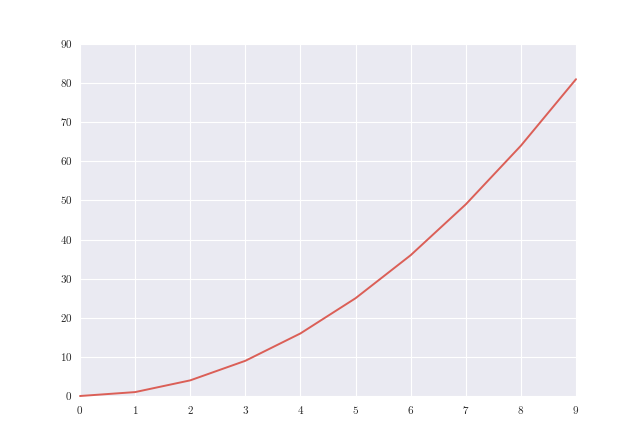

In [7]:
# Or a (X, Y) point series, as we would do with matplotlib
with replot.Figure() as figure:
    x = range(10)
    y = [i**2 for i in x]
    figure.plot(x, y)

<IPython.core.display.Javascript object>


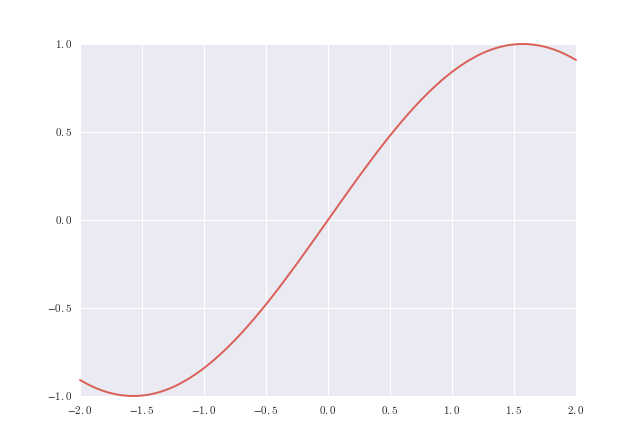

In [8]:
# But we can also plot a function, by automatically
# evaluating it on the given interval
with replot.Figure() as figure:
    figure.plot(np.sin, (-2, 2))  # Plot sinus on [-2, 2]

<IPython.core.display.Javascript object>


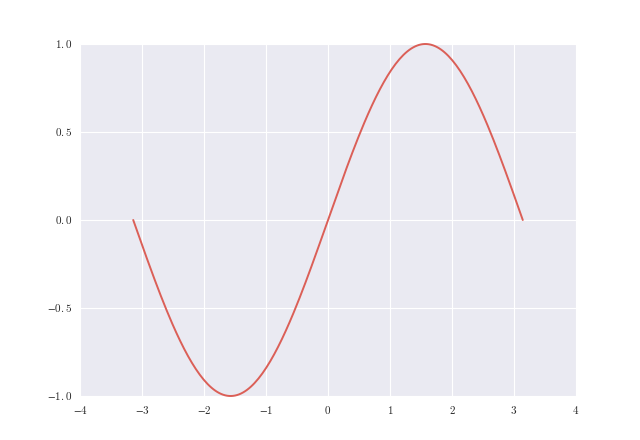

In [9]:
# We can also do the same forcing replot to use some evaluation points
with replot.Figure() as figure:
    x = np.linspace(-np.pi, np.pi, 200)
    figure.plot(np.sin, x)

<IPython.core.display.Javascript object>


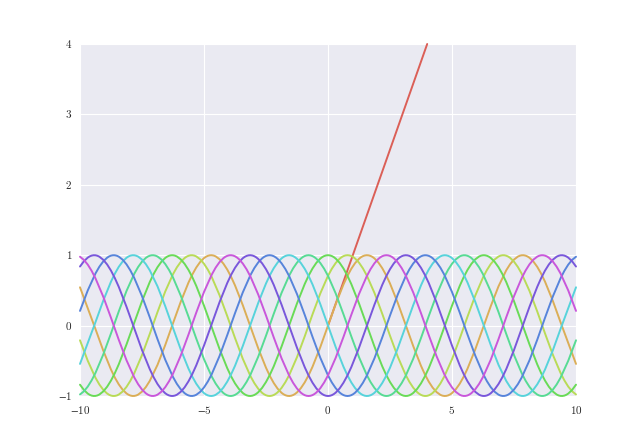

In [12]:
# And we can plot multiples graphs on the same figure
with replot.Figure() as figure:
    figure.plot(range(5))
    for i in range(8):
        figure.plot(lambda x: np.sin(x + np.pi * i / 4), (-10, 10))

## Advanced plotting

We can do more elaborated stuff easily with `replot`.

<IPython.core.display.Javascript object>


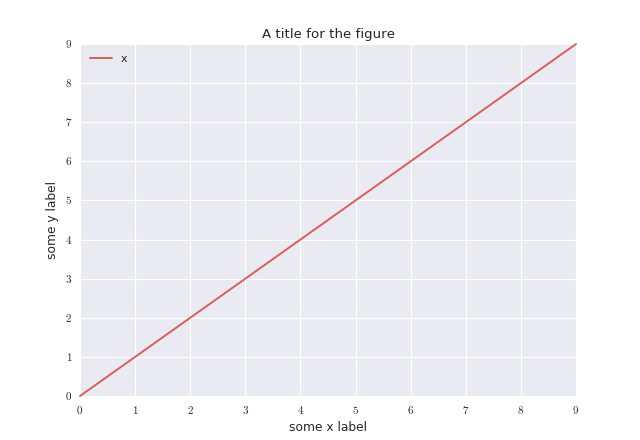

In [14]:
# Plot with a label on the axis, and a title for the figure
# Note how the legend will be automatically added when a "label" is found!
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x, label="x")
    figure.xlabel = "some x label"
    figure.ylabel = "some y label"
    figure.title = "A title for the figure"

<IPython.core.display.Javascript object>


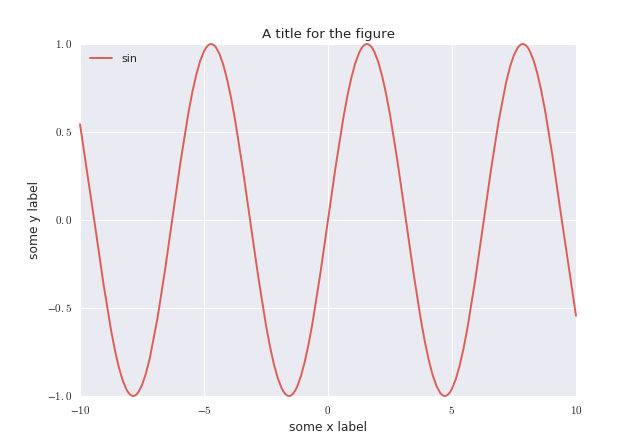

<IPython.core.display.Javascript object>


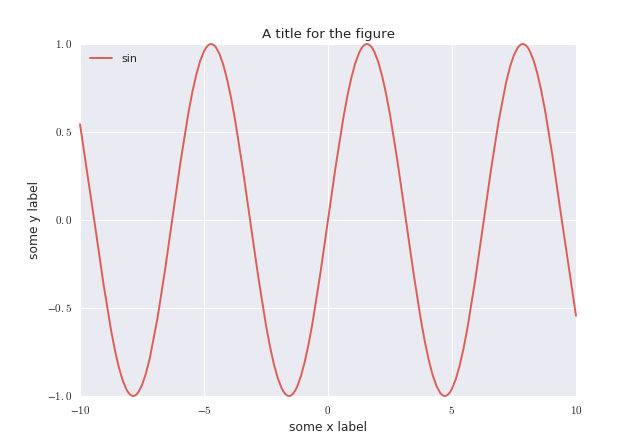

<IPython.core.display.Javascript object>


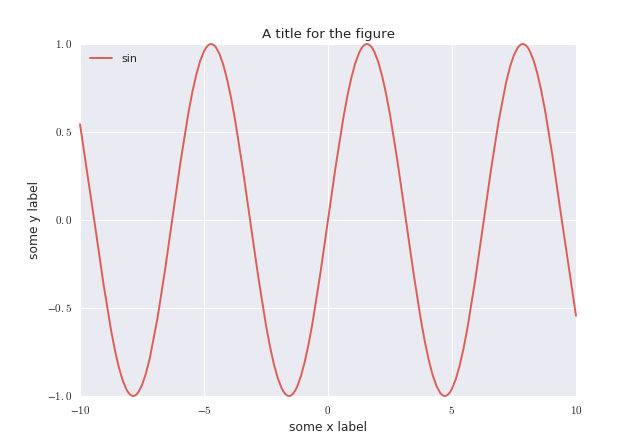

<IPython.core.display.Javascript object>


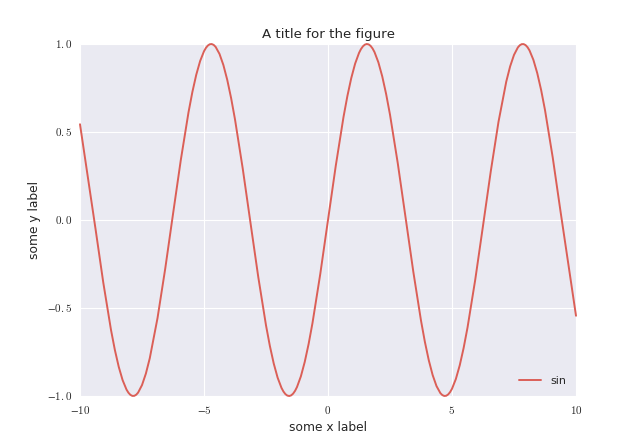

<IPython.core.display.Javascript object>


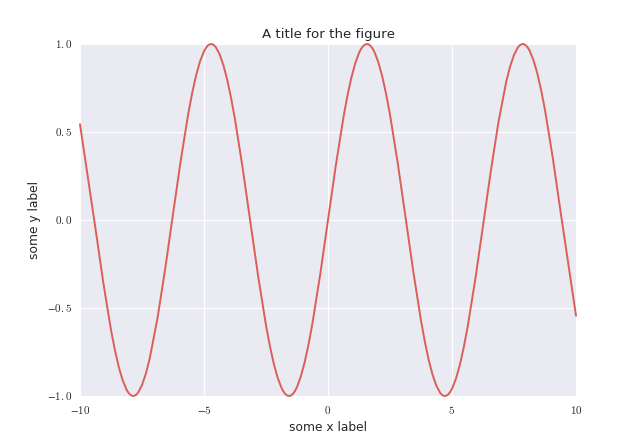

In [18]:
# We can also pass these options directly to the constructor
# Here, we force the legend to be at the best location
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend="best") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")
    
# But we could also not constraint it (best location will be choosen)
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")
    
# Or just say we want a legend (same as not constraining it)
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=True) as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

# Or force it to be in the lower right corner
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend="lower right") as figure:
    figure.plot(np.sin, (-10, 10), label="sin")
    
# Or explicitly disable the legend, even if labels are found
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=False) as figure:
    figure.plot(np.sin, (-10, 10), label="sin")

<IPython.core.display.Javascript object>


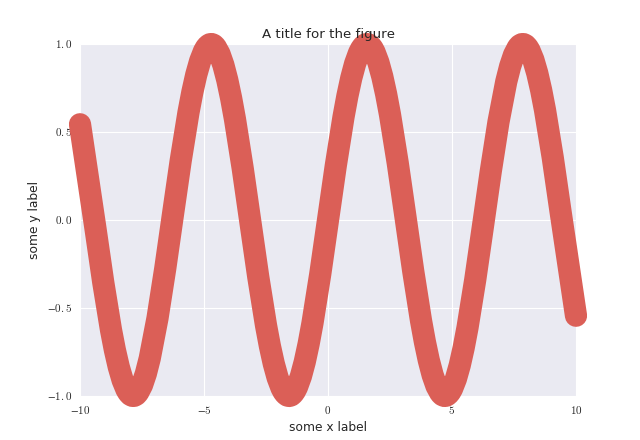

In [20]:
# Passing extra arguments to matplotlib plot command is as easy as
# passing them to replot plot command.
with replot.Figure(xlabel="some x label",
                   ylabel="some y label",
                   title="A title for the figure",
                   legend=True) as figure:
    figure.plot(np.sin, (-10, 10), linewidth=20)

<IPython.core.display.Javascript object>


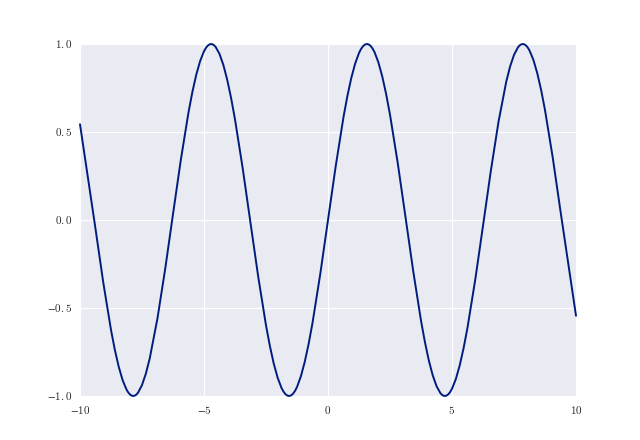

<IPython.core.display.Javascript object>


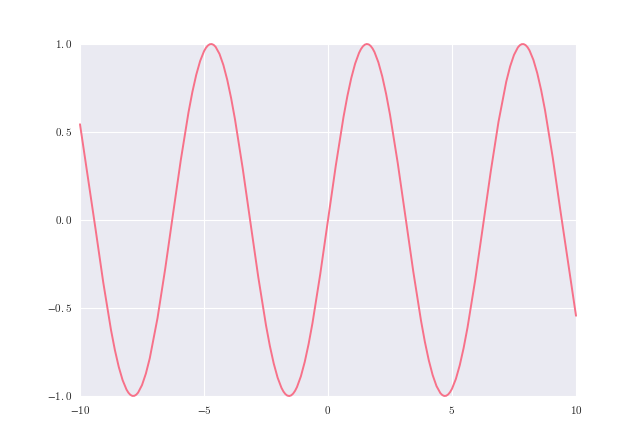

In [24]:
# You can also tweak the palette used, either with a palette name
with replot.Figure(palette="dark") as figure:
    figure.plot(np.sin, (-10, 10))

# or by explicitly passing it a seaborn palette
with replot.Figure(palette=replot.sns.color_palette("husl", 2)) as figure:
    figure.plot(np.sin, (-10, 10))

<IPython.core.display.Javascript object>


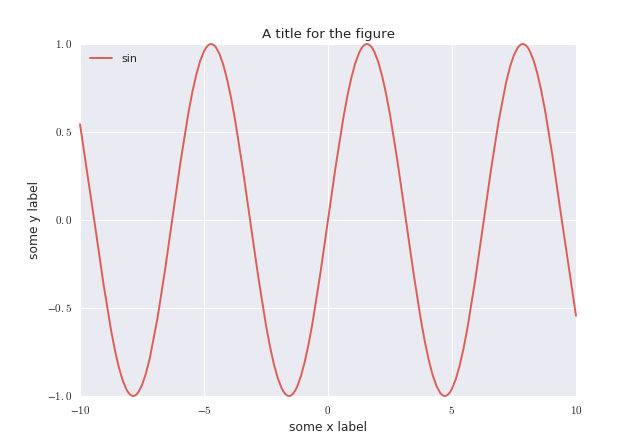

In [17]:
# It is not mandatory at all to use a with statement
fig = replot.Figure(xlabel="some x label",
                    ylabel="some y label",
                    title="A title for the figure",
                    legend="best")
fig.plot(np.sin, (-10, 10), label="sin")
fig.show()  # But in this case, we must show the figure

## One-liner plotting

You can also make plot with a one-liner.

<IPython.core.display.Javascript object>


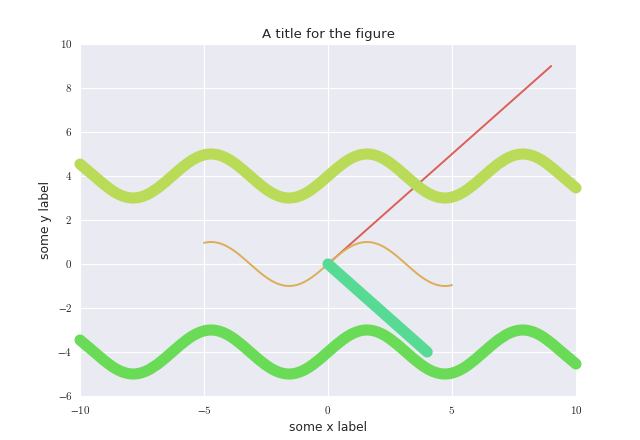

In [19]:
# Many plots done with a single one-liner
replot.plot([range(10), (np.sin, (-5, 5)), (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, (-10, 10), {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best")

<IPython.core.display.Javascript object>


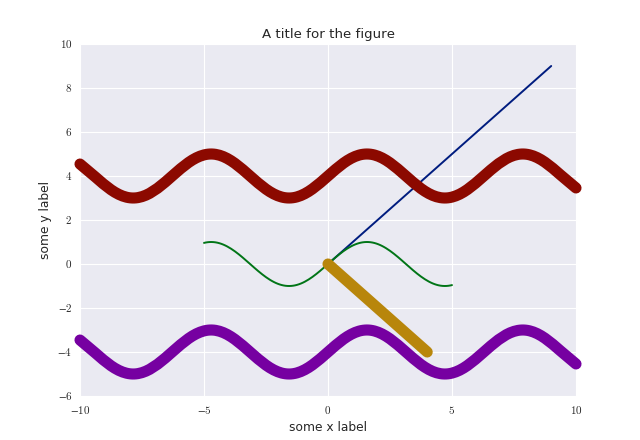

In [22]:
# Another one-liner plot example
replot.plot([range(10), (np.sin, (-5, 5)), (lambda x: np.sin(x) + 4, (-10, 10), {"linewidth": 10}), (lambda x: np.sin(x) - 4, (-10, 10), {"linewidth": 10}), ([-i for i in range(5)], {"linewidth": 10})],
            xlabel="some x label",
            ylabel="some y label",
            title="A title for the figure",
            legend="best",
            palette="dark")

## Using subplots

In [ ]:
# Using groups to define subplots
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.sin, (-10, 10), group="ç")

# TODO
# Applying a grid on a figure, one empty subplot
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid(["ab"])
    
# TODO
# Gridify example
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.gridify()
    
# TODO
# Gridify example, forced height
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.gridify(height=2)
    
# TODO
# Gridify example, forced width
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.plot(np.cos, (-10, 10), group="b")
    figure.gridify(width=1)

## Saving figures

<IPython.core.display.Javascript object>


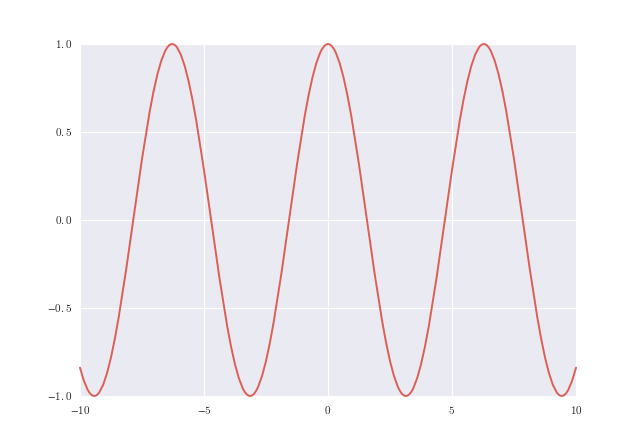

In [31]:
# Save a figure to a file
with replot.Figure(savepath="/tmp/out.png") as figure:
    figure.plot(np.cos, (-10, 10))

<IPython.core.display.Javascript object>


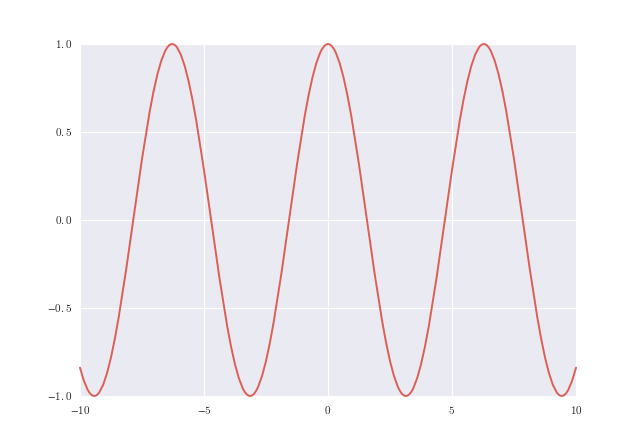

In [32]:
# or equivalently
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10))
    figure.savepath = "/tmp/out.png"

## Some errors you might encounter

In [25]:
# Invalid interval for plotting a function
with replot.Figure() as figure:
    figure.plot(np.sin, None)

InvalidParameterError: Second parameter in plot command should be a tuple specifying plotting interval.

In [26]:
# Invalid plot call, no arguments given
with replot.Figure() as figure:
    figure.plot()

InvalidParameterError: You should pass at least one argument to this function.

In [27]:
# Invalid group argument, groups are one unicode character long
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="abc")

InvalidParameterError: Group name cannot be longer than one unicode character.

In [28]:
# Invalid grid, no grid provided
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid([])

InvalidParameterError: Grid cannot be an empty list.

In [29]:
# Invalid grid, not a rectangular one
with replot.Figure() as figure:
    figure.plot(np.cos, (-10, 10), group="a")
    figure.apply_grid(["a",
                       "ba"])

InvalidParameterError: All rows must have the same number of elements.